## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# create a dataframe with the data from 'ab_data.csv' file
df = pd.read_csv('ab_data.csv')
# have a look what the data looks like
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# shape can give us information about number and rows in our data frame
df.shape

(294478, 5)

First number in the tuple represents number of rows. Hence, our data set contains 294478 rows

c. The number of unique users in the dataset.

In [4]:
# The number of unique users in the dataset
df['user_id'].nunique()

290584

Our data set has 290584 unique users.

d. The proportion of users converted.

In [5]:
p_converted = df.query('converted ==1').user_id.nunique() / df.user_id.nunique()
p_converted

0.12104245244060237

Proportion of users converted regardless of the page they landed is ~0.12104

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# firstly let's find rows for treatment group landed on old page
df_treatment1 = df.query('group == "treatment" and landing_page != "new_page"')
# number of rows in this dataset
df_treatment1.shape[0]

1965

In [7]:
# secondly we need to find rows where control group landed on new page
df_treatment2 = df.query('group != "treatment" and landing_page == "new_page"')
# number of rows in this dataset
df_treatment2.shape[0]

1928

In [8]:
# total number of times the new_page and treatment don't match
df_treatment1.shape[0] + df_treatment2.shape[0]

3893

we found that **3893** number of times the new_page and treatment don't match.

f. Do any of the rows have missing values?

In [9]:
# we can see if any missing values by assessing info output of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


The provided info of the data set demontsrated equal number of values in each column. This verifies the fact that the data set has no missing values.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# form a new data frame that exclude rows from the original data set 
# where treatment does not match with new_page or control does not match with old_page  
df2_criteria = '(group == "treatment" and landing_page == "new_page") or (group == "control" and landing_page == "old_page")'
df2 = df.query(df2_criteria)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

Now we have a clean data frame where treatment matches with new_page and control matches with old_page

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
# calculate number of unique users in df2
df2['user_id'].nunique()

290584

There are 290584 unique users in df2.

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# find duplicated records by user_id
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


There is one repetetive user_id = 773192 

c. What is the row information for the repeat **user_id**? 

The rows for repetetive user_id have index 1899 and 2893. Detailed row information for the repetetive user_id shown above. 

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2 = df2.drop([1899], axis=0)
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# probability of an individual converting regardless of the page they receive
df2[df2['converted'] == 1].user_id.count()/df2.shape[0]

0.11959708724499628

The probability of an individual converting regardless of the page they receive is 0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# probability of conversion in control group
df_control = df2.query('group == "control"')
p_control_mean = df_control.converted.mean()
p_control_mean

0.1203863045004612

Given that an individual was in the control group, the probability they converted is 0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
# probability of conversion in treatment group
df_treatment = df2.query('group == "treatment"')
p_treatment_mean = df_treatment.converted.mean()
p_treatment_mean

0.11880806551510564

Given that an individual was in the treatment group, the probability they converted is 0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
# probability that an individual received the new page
df2[df2['landing_page'] == 'new_page'].user_id.count()/df2.shape[0]

0.50006194422266881

The probability of receiving the new page is ~0.5001

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Conclusion:** As probability of user conversion regardless of whether they are in control group or not is quite low (~12%) and it is roughly the same as the probablity of user conversion from both the control and treatment groups, there is not enough evidence that new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null hypothesis is the old page is equal or better than the new page in terms of conversion rate

$H_{0}:$ **$p_{new}$** - **$p_{old}<=0$**  

Alternative hypothesis is that new page has better conversion rate than the old page

$H_{1}:$ **$p_{new}$** - **$p_{old}> 0$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
# conversion rate for  𝑝_𝑛𝑒𝑤  under the null
p_new = df2['converted'].mean()
p_new

0.11959708724499628

The **conversion rate** for $p_{new}$ under the null is 0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
# as per assumption above: that is  𝑝𝑛𝑒𝑤  and  𝑝𝑜𝑙𝑑  are equal
p_old = df2['converted'].mean()
p_old

0.11959708724499628

The **conversion rate** for $p_{old}$ under the null is 0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
# the dataframe for treatment group was created in part I (c)
# we can take number of rows of this data frame as the answer
n_new = df_treatment.shape[0]
n_new

145310

The number of individuals in the treatment group, $n_{new}$ is 145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
# the dataframe for treatment group was created in part I (b)
# we can take number of rows of this data frame as the answer
n_old = df_control.shape[0]
n_old

145274

The number of individuals in the control group, $n_{old}$ is 145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
# Simulate  𝑛_𝑛𝑒𝑤  transactions with a conversion rate of  𝑝_𝑛𝑒𝑤  under the null
new_page_converted = np.random.choice([0,1], size = n_new, p = [1-p_new, p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
# Simulate  𝑛𝑜𝑙𝑑  transactions with a conversion rate of  𝑝𝑜𝑙𝑑  under the null
old_page_converted = np.random.choice([0,1], size = n_old, p = [1-p_old, p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
# find 𝑝_𝑛𝑒𝑤  - 𝑝_𝑜𝑙𝑑 for your simulated values
np.array(new_page_converted).mean()-np.array(new_page_converted).mean()

0.0

For this particular simulation there was no difference between new_page_converted and old_page_converted

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
# Create 10,000  𝑝_𝑛𝑒𝑤  -  𝑝_𝑜𝑙𝑑  values using the same simulation process
# calculating via binominal distribution for better performance as suggested in Udacity knowledgebase:
# https://knowledge.udacity.com/questions/287802

p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000) / n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000) / n_old
p_diffs = new_converted_simulation - old_converted_simulation
p_diffs.mean()

3.5448328966566604e-06

The mean of this distribution is around zero.

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

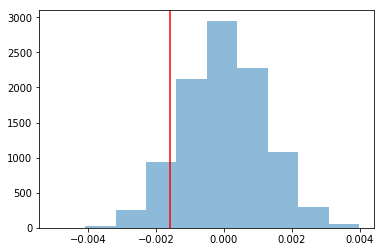

In [27]:
# actual difference between conversion probability for treatment and control groups observed in ab_data.csv
observed_diff = p_treatment_mean - p_control_mean
observed_diff 

# plot the histogram and indication where the original observed difference in proportions of conversions is
plt.hist(p_diffs, alpha = 0.5);
plt.axvline(x = observed_diff,color='red');

The plot looks like a normal distribution, and it is bell shaped and centered around zero as expected.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# the high extreme is the observed difference in ab dataset
high_ext =  observed_diff
# caluclating p-value for simulated page diffs
(p_diffs > high_ext).mean() 

0.90390000000000004

The proportion of the p_diffs are greater than the actual difference observed in ab_data.csv is ~0.9039

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Explanation for part II** 

The value calculated in part **j.** is called p-value = 0.9039. It is quite large for e-commerce as alpha threshold for e-commerce is recommended as 0.05. Our result suggests that we shall not move away from the null hypothesis because p-value signifficantly bigger than the threshold. In other words, the company shall not implement new page but keep the old page. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

#convert_old = df_control
#convert_new = df_treatment

# re-code it to my code
convert_old = np.sum((df2.query('landing_page=="old_page"').converted == 1))
convert_new = np.sum((df2.query('landing_page=="new_page"').converted == 1))

n_old = df_control.shape[0]
n_new = df_treatment.shape[0]
n_old, n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(145274, 145310)

n_new = 145274, n_old = 145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_stat, z_p_value = proportions_ztest(count = [convert_old, convert_new], nobs = [n_old, n_new], value = 0, alternative = 'smaller')
z_p_value, z_stat

(0.90505831275902449, 1.3109241984234394)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Z-test interpetation.**
z score from our test s between -1.96 and +1.96, which means there is no statistical evidence to reject the null hypothesis. In addition, p-value is similar to p_value we calculated via binominal simulation in part **j. and k.**. Again it is signifficantly larger than 0.05. The z-test calculation agrees with the previous observations that we cannot reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer.** Logistic regression model is recommended for tests where response is a categorcial variable such as **converted** value in our data set

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
# adding columns to df2 for dummy variables
df2[['drop_control_column', 'ab_page']] = pd.get_dummies(df2['group'])
# drop column 'drop_control_column' to keep full rank of the matrix
df2.drop(columns= ['drop_control_column'], axis = 1, inplace = True)
# have a look at the result after adding column 'ab_page'
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


In [33]:
# adding intercept 
df2['intercept'] = 1

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [34]:
# instantiate logistic regression model on the two columns you created in part b.
lg = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
# fit the model
results = lg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
#Provide the summary of your model
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-09 07:10 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer:**

The p-value associated with **ab_page** is 0.1899 which is different from p-value = 0.905 observed in part II of this project.

The reason for this difference is how hypothesis test was setup as explained below:

Part II of A/B test uses one right side tail hypothesis where null hypothesis is that old page is as good or better than new page:

$H_{0}:$ **$p_{new}$** - **$p_{old}<= 0 $**

$H_{1}:$ **$p_{new}$** - **$p_{old} >0 $**


Part III A/B test uses logistic regression model that uses both tails since the null and alternative hypothesis are:

$H_{0}:$ **$p_{new}$ = $p_{old}$**

$H_{1}:$ **$p_{new} \neq$ $p_{old}$**


Since the part II is right side one tail test, we can compare right tail p-value from Part II with two tail test in part III as follows:

Let $Pvalue_2$ be p-value caluclated in part II and $Pvalue_3$ be p-value caluclated in part III.
Then:

$Pvalue_2 = 1 - Pvalue_3/2$ 

or
$0.905 = 1 - 0.1899/2$

Hereby we computed same result in logistic regression model in part III as we did with the simulation approach in Part II. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**

In practice it is often happens that there is more than one predictor that can influence the response.
Therefore, adding more than one predicting variable can bring some **advantages** such as adding interactions can make the model to predict better.

However, there **disadvantages** for adding more variables or higher order terms that need to be considered:
1. An assumed relationship with a new factor and response might not exist
2. Correlated errors. As stated in part 16 of lesson 15: "Correlated errors frequently occur when our data are collected over time (like in forecasting stock prices or interest rates in the future) or data are spatially related (like predicting flood or drought regions). We can often improve our predictions by using information from the past data points (for time) or the points nearby (for space).The main problem with not accounting for correlated errors is that you can often use this correlation to your advantage to better predict future events or events spatially close to one another."
3. Outliers in the new factors can skew the results.
4. Multicollinearity observed when we have predictor variables that are correlated with one another. This can result in flipping coefficient we would expect from regression model with a single predictor. Generally we would want predictive variables to be corellated with response but not with each other.
5. Adding interactions can make model to predict better but the results will not be as easily interpreted when predicted variables were independendt (i.e. predictiong response to a change in one variable while holding other variables constant). Therefore interactions or higher order terms shall be added if only such a relationship has been observed in the data.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
# creating dataframe for data coming from 'countries.csv' file
df_countries = pd.read_csv('countries.csv')
# checking for null values
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


As we can see, the dataset can be merged with **df2** on user_id column. 

In [37]:
# test if merge df2 and countries data frames can be done fully; i.e both data sets have same amount of rows
df2.shape[0] == df_countries.shape[0]

True

df2 and countries datasets have the same amount of rows.
Hence, we shall not have any orphans on either side when merging datasets together

In [38]:
# check there are no duplicates
df_countries[df_countries.duplicated('user_id')]

,user_id,country


There are no repetetive rows by user_id in countries data set.

In [39]:
# few rows to see how countries are represented
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [40]:
# do the merge and have a look at the head of the merged dataframe
df2 = df2.merge(df_countries, on='user_id')
# present few rows after the merge
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US


In [41]:
# create dummy variables for 'country' column
df_country_dummies = pd.get_dummies(df2.country)
# join df2 with dataframe representing dummy variables 
df2 = df2.join(df_country_dummies)
# present few rows of df2 after adding dummy variables
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,0,1


In [42]:
# Build and fit the logistic model for predicting conversion based on country
# note: CA was excluded to ensure full rank of the matrix
lg_country = sm.Logit(df2['converted'], df2[['intercept', 'US', 'UK']])
results_country = lg_country.fit()
results_country.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-09 07:10 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
==================================================================

"""

As seen on the model summary for including country into prediction, country does not have statistical significance as both 'US' and 'UK' values are above the 0.05 threshold. Hence, country alone does not influence the conversion rate.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
# create columns in df2 for ab_page and interactions with US and UK country columns
df2['ab_page_US'] = df2['ab_page'] * df2['US']
df2['ab_page_UK'] = df2['ab_page'] * df2['UK']

In [44]:
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US,ab_page_US,ab_page_UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,0,1,0,0


In [45]:
# create a new logistic model that introduces ineractions between page and country
lg_page_country = sm.Logit(df2['converted'], df2[['intercept', 'ab_page','US', 'UK', 'ab_page_US', 'ab_page_UK']])
results_page_country = lg_page_country.fit()
results_page_country.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-09 07:11 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
ab_page_US     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
ab_page_UK     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

As we can see, adding country factors in prediction variables did not have signifficant effect of conversions. All p-values except intercept are signifficantly higher then 0.05 and therefore the null hypthesis shall not be rejected. This means that the company shall keep the old page.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0